# Numpy tasks

## General

In [1]:
import numpy as np

### Task Version number
> a) extract numpy version number

In [2]:
np.__version__

'1.19.1'

## Arrays

---



### Task: Speed comparison, numpy is faster

> a) compute the sum of squared values from 10-10 000 using a list comprehension. This corresponds to:
$$
\sum_{i=10}^{10 000}i^2
$$

> b) compute the same using numpy

> c) perform a speed comparison between the two approaches  *Hint* you can measure time using:
```
import time
start = time.time()
# your code
time_taken = time.time() - start
```

In [28]:
# a, sum of squared numbers in the range 10:10000 + c
start = time.time()
squared_values = sum([number**2 for number in range(10,1000001)])
print(squared_values)
time_taken = time.time() - start
print(time_taken)

333333833333499715
0.24535059928894043


In [29]:
# b + c
start = time.time()
squared_val = sum(np.arange(10,1000001)**2)
print(squared_val)
time_taken = time.time() - start
print(time_taken)

333333833333499715
0.17187714576721191


### Task: Speed comparison, no lists are faster

1) create a for loop where you append numbers to a list and a numpy array (let's say 1 000 000). Show that list are faster than numpy arrays in this situation.

This is a design decision which makes python cheap to append to (read more [here](https://stackoverflow.com/questions/5932328/internals-of-python-list-access-and-resizing-runtimes)).

**Bonus**: You can make numpy noticably faster by preallocating memory. E.g. by creating an array of zeros and assigning the values instead of appending them.


In [40]:
#list
append_list = []

start = time.time()
for num in range(0,1000001):
    append_list.append(num)
time_taken = time.time() - start
print(time_taken)

#array
append_array = np.array([])

start = time.time()
for num in np.arange(0,1000001):
    np.append(append_array, num)
time_taken = time.time() - start
print(time_taken) #slooow

0.09058666229248047
4.458084344863892


## Creating and combining arrays

---

### Task: Combining arrays

stack  two  numpy arrays vertically.

**Example:**

```python
a = np.arange(10).reshape(2,-1)
b = np.repeat(1, 10).reshape(2,-1)
```

Output:
```
#> array([[0, 1, 2, 3, 4],
#>        [5, 6, 7, 8, 9],
#>        [1, 1, 1, 1, 1],
#>        [1, 1, 1, 1, 1]])
```

In [59]:
a = np.arange(9).reshape(3,-1)
print(a)

b = np.repeat(12, 9).reshape(3,-1)
print(b)

c = np.stack([a, b])
print(c)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[12 12 12]
 [12 12 12]
 [12 12 12]]
[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[12 12 12]
  [12 12 12]
  [12 12 12]]]


## Indexing arrays

---

### Task: Extract the middle
> extract the middle row in an 1D array. If there is an even amount of arrays extract the two middle rows.

**Example:**
```
d = np.array([1, 2, 3])
print(get_middle(d))
print(get_middle(np.arange(4)))
```

Output
```
2
[1 2]
```



In [75]:
# creating a function to get the middle row(s)
d = np.array([1, 2, 3])

def get_middle(array):
    if len(array) % 2 != 0: #uneven
        middle = int(len(array) / 2)
        middle_value = array[middle]
    else: #even
        middle1 = int(len(array) / 2) -1 #first middle element
        middle2 = int(len(array) / 2) #second middle element
        middle_value = array[[middle1,middle2]]
    return middle_value

In [78]:
a = np.array([1, 7, 5, 6, 9, 7])
mid_a = get_middle(a)
print(mid_a)

[5 6]


### Task: Word frequencies
> a) Given one array (of strings) select all values in a corresponding  array that corresponds to the highest values in the initial array.

**Example:** Most frequent words
```
words = np.array(["a", "duck", "dog", "the"])
counts = np.array([30, 2, 4, 110])
print(f(words, counts))
```

Output
```
"the"
```

> bonus: generalize it to the n highest values

In [88]:
words = np.array(["a", "duck", "dog", "the", "horse"])
counts = np.array([30, 2, 4, 110, 210])

#np.argmax

def f(words, counts):
    max_count_idx = np.argmax(counts)

    return words[max_count_idx]

print(f(words, counts))

horse


## Formula to Code

---

### Task: The Euclidian Norm
> implement the euclidian ($L^2$) norm defined as: 

$$||x||_2 = \sqrt{x^2_1 + x^2_2 + ... x^2_n}$$

Check that it it gives the same result as `np.linalg.norm`

In [12]:
def euclidean(x):
    return np.sqrt(sum(x**2))

euclidean(np.array([1, 2, 3]))

3.7416573867739413

In [11]:
np.linalg.norm(np.array([1, 2, 3]))

3.7416573867739413

### Task: The sigmoid function
The sigmoid (or the logistic) function is a function which is normalized between 0 and 1. It is defined as:
$$
s(x) = \frac{1}{1+e^{-x}}
$$

> Implement the sigmoid function

Example:
```
print(s(0))
print(s(2))
print(s(100))
```

Output:
```
0.5
0.88079...
1.0
```

> **Bonus:** plot the function

In [115]:
def s(x:np.ndarray) -> np.ndarray:
    s_x = 1 / (1 + np.exp(-x))
    
    return s_x

print(s(0))
print(s(2))
print(s(100))
s(np.array([0, 2, 100])) #alternatively put all three into one array

0.5
0.8807970779778823
1.0


array([0.5       , 0.88079708, 1.        ])

In [121]:
# BONUS: Plotting the sigmoid function
grid = np.arange(-4, 4, step = 0.1)
print(grid.shape)

y = s(grid)
print(y)

(80,)
[0.01798621 0.01984031 0.02188127 0.02412702 0.02659699 0.02931223
 0.03229546 0.03557119 0.03916572 0.04310725 0.04742587 0.05215356
 0.05732418 0.06297336 0.06913842 0.07585818 0.0831727  0.09112296
 0.09975049 0.10909682 0.11920292 0.13010847 0.14185106 0.15446527
 0.16798161 0.18242552 0.19781611 0.21416502 0.23147522 0.24973989
 0.26894142 0.2890505  0.31002552 0.33181223 0.35434369 0.37754067
 0.40131234 0.42555748 0.450166   0.47502081 0.5        0.52497919
 0.549834   0.57444252 0.59868766 0.62245933 0.64565631 0.66818777
 0.68997448 0.7109495  0.73105858 0.75026011 0.76852478 0.78583498
 0.80218389 0.81757448 0.83201839 0.84553473 0.85814894 0.86989153
 0.88079708 0.89090318 0.90024951 0.90887704 0.9168273  0.92414182
 0.93086158 0.93702664 0.94267582 0.94784644 0.95257413 0.95689275
 0.96083428 0.96442881 0.96770454 0.97068777 0.97340301 0.97587298
 0.97811873 0.98015969]


In [127]:
import matplotlib.pyplot as plt

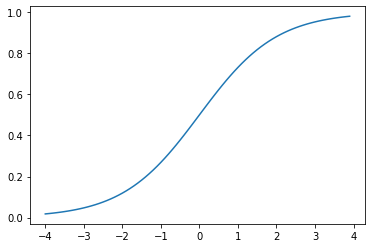

In [132]:
plt.plot(grid, y, "-") # alternativelt "*"
plt.show()

### Task: Vector Distances
> Implement the following distances:
- Euclidian ($L^2$) distance
- Cosine distance
- the Hamming distance


**The euclidian distance** is a distance measure which denoted the length between two vectors $a$ and $b$ as defined by:
$$
dist(a, b) = || a-b || 
$$

You can check that it give the same result as `scipy.spatial.distance.euclidean`.

**The cosine distance** is a distance measure based on the angle between to vectors, $a$ and $b$. It can be shown that it is equal to: 

$$
dist(a, b) = 1 - cos(\theta) =  1 - \frac{a \cdot b} {|| a || \cdot || b ||}
$$

You can check that it give the same result as `scipy.spatial.distance.cosine`.


**The Hamming distance** between 1-D arrays $u$ and $v$, is simply the proportion of disagreeing components in $u$ and $v$. 

**Example**:
```python
u = [2, 6, 5, 8, 1, 2, 4, 5, 2, 6]
v = [0, 0, 5, 8, 1, 2, 4, 5, 2, 6]
print(hamming(u, v))
```

Output:
```
0.2
```

You can check that it give the same result as `scipy.spatial.distance.hamming`.


> **Bonus**: Cosine similarity is a similarity measure which is defined as $1 - cos\_dist$. Why does this constitute a reasonable measure of similarity? *Hint* What is the potential range of values. Try out a few vectors and see.

<br /> 

<details>
  <summary>Answer</summary>

  Cosine similarity is normalized. That means that if the vector are the same (ignore length/magnitude) the cosine similarity is 1 (i.e. they as similar as can be). So the closer it is to 1 the more similar the vectors are.
</details>

<br /> 


> **Bonus**: Why would you want to use cosine distance instead of the euclidian norm?

<br /> 

<details>
  <summary>Answer</summary>

  Cosine distance, or cosine similarity, is typically used to denote the distance between two vectors ignoring magnitude. Actually it can be [shown](https://stats.stackexchange.com/questions/146221/is-cosine-similarity-identical-to-l2-normalized-euclidean-distance) that euclidian norm of a normalized vector is proportional to the cosine distance.
</details>

<br /> 


### Task: Shannon Enthropy

Calculate the shannon entropy of the follow dice throws:
```
[1, 2, 3, 4, 5, 6]
[1, 2, 1, 3, 1, 4]
[6, 5, 5, 6, 5, 4]
```
Both given a standard dice probability $\frac{1}{6}$ for each outcome and  weighted dice with the probabilites:

`{1: 0.1, 2: 0.1, 3: 0.1, 4: 0.2, 5: 0.2, 6: 0.3}`

Shannon entropy is defined as:

$$
entropy(x) := \sum_{i=1}^n P(x_i) \cdot log P(x_i)
$$


In [138]:
# for task below
def f_function(x, betas):
    parabola = betas[0] + betas[1] * x + betas[2] * x**2

    return parabola


betas = 1, 1.4, 2
x = np.arange(-10, 10, 0.01)
f_function(x, betas)


array([187.    , 186.6142, 186.2288, ..., 213.7598, 214.1728, 214.5862])

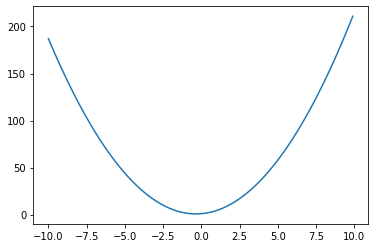

In [135]:
plt.plot(x, f_function(x, betas))

### Task Finding the minimum of a parabola

> 1) program a function that given a list of grid $x$ and a tuple with three entries ($b_1$, $b_2$, $b_3$) computes the parabola $b_1 + b_2x + b_3x^2$ 

```python
x = np.arange(-10, 10, 0.1) #from -10 to 10 with increments of 0.1
y = f(x, betas=(1, 1.4, 2)) 
```

Which corresponds to $1 + 1.4x + 2x^2$.

> 2) Program a function which calculates the gradient $f'(x_i)$ using derivatives.

<br /> 

<details>
  <summary>Help with derivatives</summary>

---

To solve the task it might be convenient to know:
- The derivative of a constant is 0 

$\frac{d}{dx} c = 0$

- The derivative of $c \cdot x$ is $c$

$\frac{d}{dx} cx = c$

- The derivative of $x^n$ is $n \cdot x^{n-1}$

$\frac{d}{dx} x^n = n \cdot x^{n-1}$

---

</details>


For example:
```python
x = 2
gradient = df(x, betas=(1, 1.4, 2))
print(gradient)
```

Output:
```
9.4
```
> 3) Using 2) create a function which given an initial starting state i) computes gradient ii) minimizes the gradient by taking a small step (learning rate) toward the minimum iii) keep doing this `n` times

Test that you function get similar results as you would get using provided `n` is high enough and a reasonable learning rate:
```
x[y.argmin()]  # which value of x corresponds to the minimum of y
```

**Bonus**: Instead of setting an `n` make it so that the functions stops when there only little 

In [140]:
# output should be 9.4 not 5.4

# TASK 2
def f_2(x, betas):
    derivative_result = 0 + 1.4 + 2 * 2 * x

    return derivative_result

x = 2
f_2(x, betas)
#on class
#f(x) = 1 + 1.4x + 2x^2 = f'(x) = 0 + 1.4 + 2*2*x^(2-1) = f'(x) = 1.4 + 2*2x 
# positive gradient: make x more negative. Negative gradient: make x more positive
# while or for loop until minimum is reached

9.4

In [ ]:
# TASK 3
def find_min(x, betas, i):
    
    gradient = f_2(x, betas)

    while gradient < 0:
        i += 0.01
    while gradient > 0:
        i -= 0.01
    if i == 0

    #stop efter n times

find_min(3.6)


### Task: Ordinary Least Squares

Ordinary least squares (OLS) is a popular apprach for estimating a linear fit. Its matrix formulation is given by:

$$
(X^TX)\hat{\beta}=X^Ty
\Rightarrow
\hat{\beta}=(X^TX)^{-1}X^Ty
$$

> Calculate the OLS of the given datapoints below.

Feel free to check your results using `lm()` in R or using [`statsmodels`](https://www.statsmodels.org/stable/regression.html) or [`sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

**Bonus:** Plot the fit, does it make sense?

**Bonus:** Using OLS fit a quadratic polynomial

**Bonus:** lm() in python. R has a convenient function `lm` where you fit a function using a string formula and dataset. Create a similar function in python by parsing the string. This would look something like this: 
```
data = {"x": np.array([0, 1, 2, 3]), "y": np.array([-1, 0.2, 0.9, 2.1]) }
lm(formula="y~1 + x", data=data)
```

In [ ]:
# our x, y datapoints
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

# add a list of ones denoting intercept
X = np.vstack([np.ones(len(x)), x]).T
print(X)
print(y)

# solve using OLS:
# ...

### Task: One-hot encoding

One-hot encoding denote transforming a series of categories (e.g. "Natural language processing", "Neuroscience" ... or 1, 2, ...) into a matrix of shape (*, num_classes) that have zeros 
everywhere except where the index (of the last dimension) mathces the corresponding value of the input label, in which case it will be 1. For instance the vector `[0, 1, 0]` could denote "Neuroscience".

**Example:**
```
np.random.seed(101) 
arr = np.random.randint(1,4, size=6)
print(arr)
print(one_hot(arr))

```

Output:
```
array([2, 3, 2, 2, 2, 1])
array([[ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.]])
```

# Additional Task

---


## Creating Array

### Task: Creating the bullseye

> Create a function which for an input shape (Tuple[int, int]) return a matrix of the same shape where the border are ones, the middle is 8 and the remainder is zeros.

**Example:**
```
print(bullseye((5, 5)))
print(bullseye((5, 6)))
```

Output:
```
[[1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 9. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1.]]

[[1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 1.]
 [1. 0. 9. 9. 0. 1.]
 [1. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1.]]

```